In [108]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import pandas_ta as ta

import warnings
warnings.filterwarnings('ignore')

from darts.timeseries import TimeSeries

# pandas==2.2.2
# numpy==2.1.1
#installed from !pip install git+https://github.com/engcarlo/Technical-Analysis-Indicators---Pandas.git@patch-1

In [ ]:
# _nifty50 = yf.download("^NSEI", start='2005-01-01', end='2025-05-15', progress=False,interval='1d')

In [120]:
# Correct the column names
_nifty50.columns=["Close","High","Low","Open","Volume"]


In [121]:
_nifty50.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [145]:
#downloaded the data has missing tradding days, first we extent the date by introducing the missing dates and fill with backword fill

_temp = _nifty50.copy()
_temp.index = pd.to_datetime(_temp.index)
_temp=_temp.asfreq('D')
_temp.ffill(inplace=True)
_temp.bfill(inplace=True)

_time = TimeSeries.from_dataframe(_temp,value_cols="Close",fill_missing_dates=True,freq="D")

In [147]:
_time.univariate_values()[10:]

array([ 5000.54980469,  5021.35009766,  5021.35009766, ...,
       24924.69921875, 24578.34960938, 24666.90039062])

In [104]:
# the objective of this to apply the arima model and see how we can fine tune the parameters and test the residuals

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


#fit the model 
model = ARIMA(data['Close'], order=(1, 1, 1))
model_fit = model.fit()
# Print the summary of the model
print(model_fit.summary())
# Plot the residuals 
residuals = model_fit.resid



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6450
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -38646.662
Date:                Fri, 16 May 2025   AIC                          77299.324
Time:                        10:40:05   BIC                          77319.639
Sample:                    09-17-2007   HQIC                         77306.354
                         - 05-14-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2049      0.229      0.896      0.370      -0.243       0.653
ma.L1         -0.1749      0.228     -0.767      0.443      -0.622       0.272
sigma2      9391.0604     51.248    183.246      0.0

,close,high,low,open,volume
date,,,,,
2025-01-01,23742.900391,23822.800781,23562.800781,23637.650391,154900.0
2025-01-02,24188.650391,24226.699219,23751.550781,23783.000000,283200.0
2025-01-03,24004.750000,24196.449219,23976.000000,24196.400391,312300.0
2025-01-04,23616.050781,24089.949219,23551.900391,24045.800781,278100.0
2025-01-05,23616.050781,24089.949219,23551.900391,24045.800781,278100.0
...,...,...,...,...,...
2025-05-10,24924.699219,24944.800781,24378.849609,24420.099609,368700.0
2025-05-11,24924.699219,24944.800781,24378.849609,24420.099609,368700.0
2025-05-12,24924.699219,24944.800781,24378.849609,24420.099609,368700.0


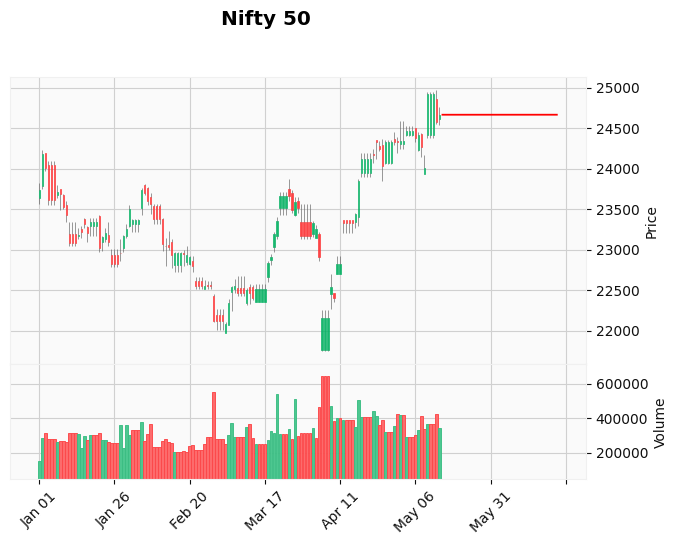

In [106]:
# Generate forecast for next 40 days and align index with future dates

_forcasting_period =40 
_charting = data[data.index>='2025-01-01']

# extending the data frame with the forcasting period
new_date_range = pd.date_range(start=_charting.index.max(),freq="D", periods=_forcasting_period)
_charting = _charting.reindex(_charting.index.union(new_date_range))
_charting = _charting.fillna(np.nan)

_forcasting_data_set = model_fit.forecast(steps=_forcasting_period)
_charting["forcasts"] =np.nan
_charting.loc[new_date_range, "forcasts"] = _forcasting_data_set


# Plot with forecast overlay
_adiectives = mpf.make_addplot(_charting["forcasts"],color="Red")
mpf.plot(_charting,type='candle',style='yahoo',title='Nifty 50',ylabel='Price',
    volume=True,show_nontrading=False,addplot=_adiectives)
